
<h2 align='center'> MÔN HỌC: HỌC MÁY (MACHINE LEARNING) </h2>

---

## CHƯƠNG 4: HỌC KHÔNG GIÁM SÁT - UNSUPERVISED LEARNING
---


<img src='pic/pic1.jpg' width='700px'>




## A. Phân cụm khách hàng (Customer Segmentation) với KMeans
---

Mô tả tập dữ liệu: Data_sales_Excercise.csv

File dữ liệu sử dụng:

**Data_sales_Excercise.csv**: Dữ liệu mua hàng của 200 MiniMart với một
nhà phân phối hàng hóa trong năm 2019:

1. Cột No: Mã của MiniMart
2. Cột City: Ký hiệu khu vực đặt MiniMart
3. Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
4. Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
5. Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

### 1.Tải và quan sát tập dữ liệu

In [2]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## THỰC HÀNH
---
Mô tả tập dữ liệu: Data_sales_Excercise.csv. Dữ liệu mua hàng của 200 MiniMart với một nhà phân phối hàng hóa trong năm 2019. Trong đó:
* Cột No: Mã của MiniMart
* Cột City: Ký hiệu khu vực đặt MiniMart
* Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
* Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
* Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

**YÊU CẦU:**
Sử dụng thuật toán phân cụm Kmeans cho tập dữ liệu với 2 thuộc tính phân cụm: Grocery, Milk:
1. Sử dụng phương pháp khửu tay, Xác định số cụm tối ưu.
2. Thực hiện phân cụm dữ liệu với số cụm tối ưu đã chỉ ra ở yêu cầu 1. Trực quan hóa kết quả phân cụm, Liệt kê danh sách MiniMart theo từng cụm và cho nhận xét.


In [3]:
#{SINH VIÊN THỰC HIỆN TẠI ĐÂY}

df_sale = pd.read_csv('data/Data_sales_Excercise.csv',
                   index_col=0)

In [4]:
# Đọc dữ liệu của 5 bản ghi đầu tiên
df_sale.head()

,City,Distance,Grocery,Milk
No,,,,
1,K,60,69900,6325
2,K,30,79000,5200
3,E,52,85500,7825
4,E,57,17100,8375
5,E,55,5500,5450


In [5]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   City      200 non-null    object
 1   Distance  200 non-null    int64 
 2   Grocery   200 non-null    int64 
 3   Milk      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df_sale.describe()

,Distance,Grocery,Milk
count,200.000000,200.000000,200.000000
mean,46.155000,53620.500000,5954.375000
std,17.492309,34855.146477,1777.210276
min,19.000000,0.000000,2600.000000
25%,30.000000,26575.000000,4550.000000
50%,47.000000,46400.000000,5775.000000
75%,63.000000,78225.000000,7431.250000
max,75.000000,143500.000000,10075.000000


In [7]:
# Quan sát thuộc tính thành phố
df_sale['City'].describe()

count     200
unique      2
top         E
freq      112
Name: City, dtype: object

In [8]:
df_sale['City'].value_counts()

E    112
K     88
Name: City, dtype: int64

E    112
K     88
Name: City, dtype: int64


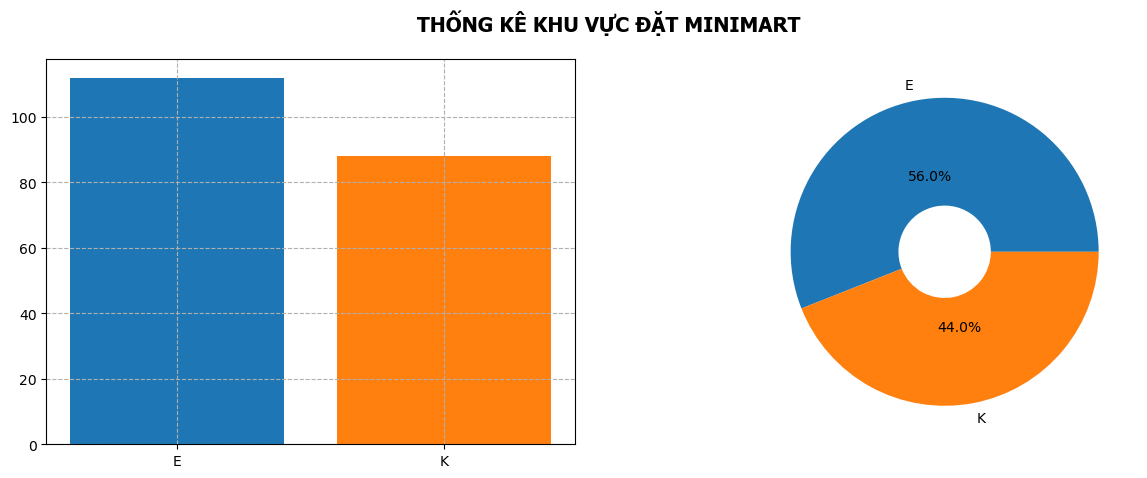

In [9]:
#Thống kê số lượng khu vực đặt MiniMart:
Citys = df_sale.City.value_counts()
print(Citys)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(['E','K'],Citys.values,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')

plt.subplot(1,2,2)
plt.pie(Citys.values,
        labels=Citys.index,
        autopct='%1.1f%%', 
        pctdistance=0.5,
        wedgeprops=dict(width=0.7), colors=['#1E77B4','#FF7F0F'])

plt.suptitle('THỐNG KÊ KHU VỰC ĐẶT MINIMART', fontname='Tahoma',fontweight='bold',
                                                   fontsize=15)
plt.show() 

In [10]:
# Thống kê khoảng cách từ MiniMart tới các nhà phần phối
df_sale['Distance'].describe()

count    200.000000
mean      46.155000
std       17.492309
min       19.000000
25%       30.000000
50%       47.000000
75%       63.000000
max       75.000000
Name: Distance, dtype: float64

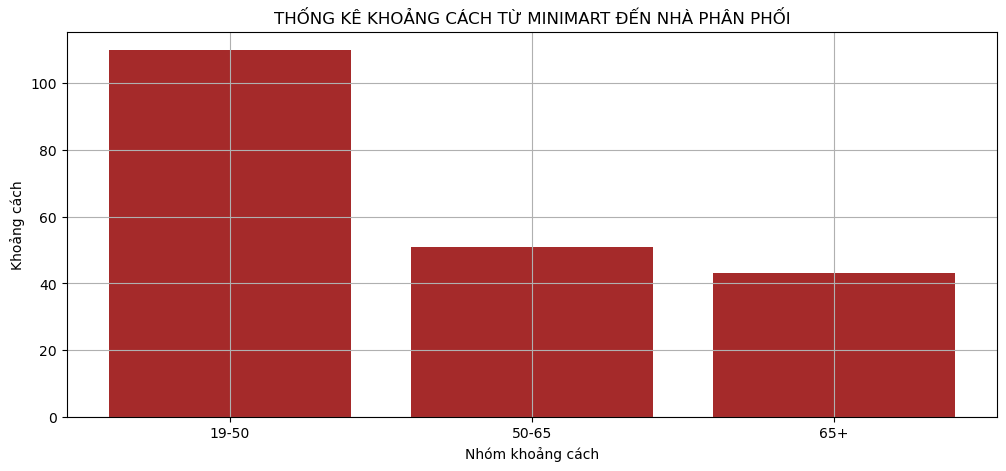

In [11]:
#Vẽ biểu đồ cột quan sát khoảng cách từ MiniMart tới các nhà phần phối
distance_1 = df_sale.Distance[(df_sale.Distance <= 50) & (df_sale.Distance >= 19)]
distance_2 = df_sale.Distance[(df_sale.Distance <= 65) & (df_sale.Distance > 50)]
distance_3 = df_sale.Distance[df_sale.Distance >=65]

x = ["19-50","50-65","65+"]
y = [len(distance_1.values),len(distance_2.values),len(distance_3.values)]

plt.figure(figsize=(12,5))
plt.bar(x, y, color='brown')
plt.title("THỐNG KÊ KHOẢNG CÁCH TỪ MINIMART ĐẾN NHÀ PHÂN PHỐI")
plt.xlabel("Nhóm khoảng cách")
plt.ylabel("Khoảng cách")
plt.grid(True)
plt.show()

- Khoảng cách nhỏ nhất là 19, lớn nhất là 75, trung bình là 46 và chủ yếu tập trung ở khoảng 19-50

In [12]:
# Quan sát biểu đồ số tiền mà minimart dùng để mua hàng tạp hóa trong năm 2019
df_sale['Grocery'].describe()

count       200.000000
mean      53620.500000
std       34855.146477
min           0.000000
25%       26575.000000
50%       46400.000000
75%       78225.000000
max      143500.000000
Name: Grocery, dtype: float64

- trung bình là 53620, nhỏ nhất là 0, lớn nhất là 143500

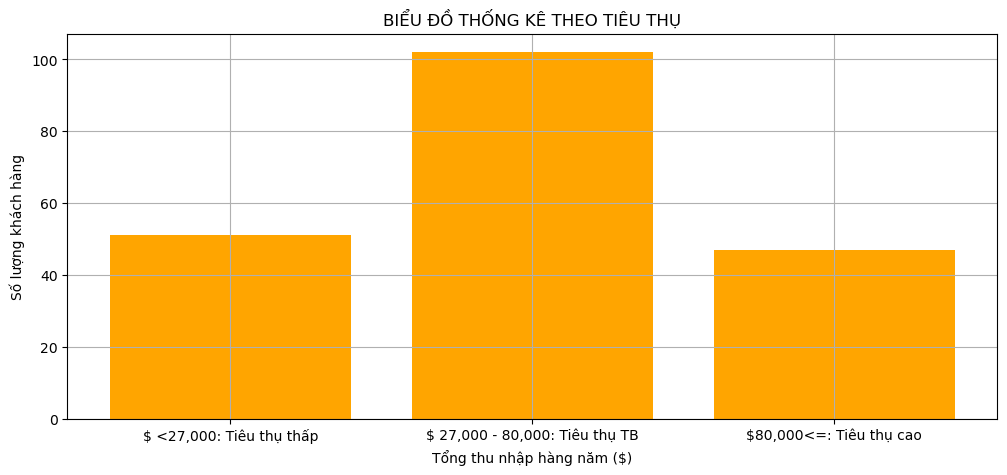

In [13]:
#Trực quan hóa dữ liệu theo từng nhóm thu nhập:
Grocery_1 = df_sale['Grocery'][(df_sale['Grocery'] < 27000)]
Grocery_2 = df_sale['Grocery'][(df_sale['Grocery'] >= 27000) & (df_sale['Grocery'] < 80000)]
Grocery_3 = df_sale['Grocery'][(df_sale['Grocery'] >= 80000)]

aix = ["$ <27,000: Tiêu thụ thấp", "$ 27,000 - 80,000: Tiêu thụ TB", "$80,000<=: Tiêu thụ cao"]
aiy = [len(Grocery_1.values), len(Grocery_2.values), len(Grocery_3.values)]

plt.figure(figsize=(12,5))
plt.bar(aix, aiy, color='orange')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO TIÊU THỤ")
plt.xlabel("Tổng thu nhập hàng năm ($)")
plt.ylabel("Số lượng khách hàng")
plt.grid(True)
plt.show()

- trung bình là 53620, nhỏ nhất là 0, lớn nhất là 143500, và mức chi tiêu chủ yếu nằm trong mức trung bình từ 27,000 - 80,000$

In [14]:
# Quan sát số tiền mà minimart dùng để mua sữa của nhà phân phối trong năm 2019

# Quan sát các đặc trưng thống kê 
df_sale['Milk'].describe()

count      200.000000
mean      5954.375000
std       1777.210276
min       2600.000000
25%       4550.000000
50%       5775.000000
75%       7431.250000
max      10075.000000
Name: Milk, dtype: float64

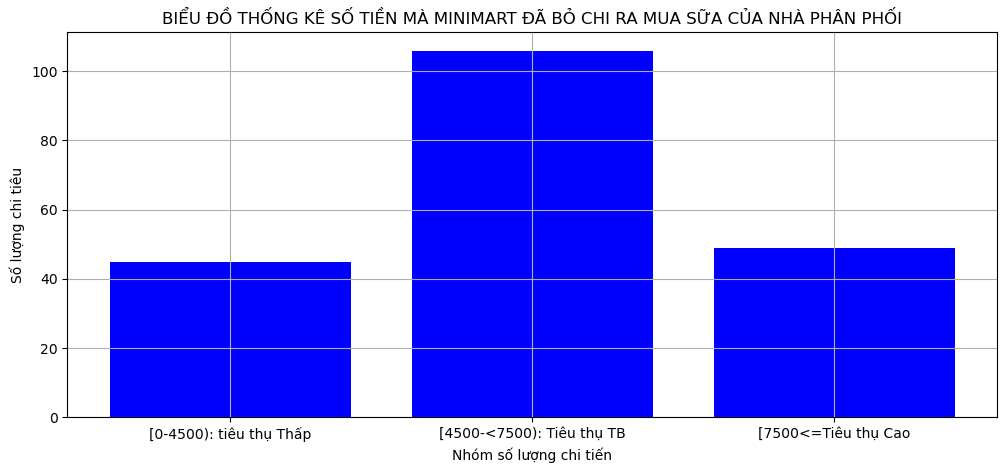

In [15]:
#Trực quan hóa dữ liệu theo từng nhóm dựa vào điểm chi tiêu:
Milk_1 = df_sale['Milk'][(df_sale['Milk'] < 4500)]
Milk_2 = df_sale['Milk'][(df_sale['Milk'] >= 4500) & (df_sale['Milk'] < 7500)]
Milk_3 = df_sale['Milk'][(df_sale['Milk'] >= 7500)]                                  

ssx = ["[0-4500): tiêu thụ Thấp", "[4500-<7500): Tiêu thụ TB", "[7500<=Tiêu thụ Cao"]
ssy = [len(Milk_1.values), len(Milk_2.values), len(Milk_3.values)]

plt.figure(figsize=(12,5))
plt.bar(ssx,ssy, color='blue')
plt.title("BIỂU ĐỒ THỐNG KÊ SỐ TIỀN MÀ MINIMART ĐÃ BỎ CHI RA MUA SỮA CỦA NHÀ PHÂN PHỐI")
plt.xlabel("Nhóm số lượng chi tiến")
plt.ylabel("Số lượng chi tiêu")
plt.grid(True)
plt.show()

- Trung bình là 5954, nhỏ nhất là 2600, lớn nhất là 10075, và tập trung chủ yếu ở khoảng 4500 - 75000

### Tiến hành phân cụm dữ liệu


In [16]:
# Sử dụng phương pháp khửu tay (Elbow) xác định số cụm tối ưu.
#lấy dữ liệu để phân cụm dữ liệu
data_cluster = df_sale.iloc[:,1:]
data_cluster.head()

,Distance,Grocery,Milk
No,,,
1,60,69900,6325
2,30,79000,5200
3,52,85500,7825
4,57,17100,8375
5,55,5500,5450


In [17]:
#lấy biến độc lập:
X_cluster = data_cluster.values

#Hiển thị 10 mẫu đầu tiên:
X_cluster[:10,]

array([[   60, 69900,  6325],
       [   30, 79000,  5200],
       [   52, 85500,  7825],
       [   57, 17100,  8375],
       [   55,  5500,  5450],
       [   68, 27200,  8550],
       [   41, 20500,  4500],
       [   20, 69000,  5050],
       [   33, 13200,  8325],
       [   37, 31800,  5975]], dtype=int64)

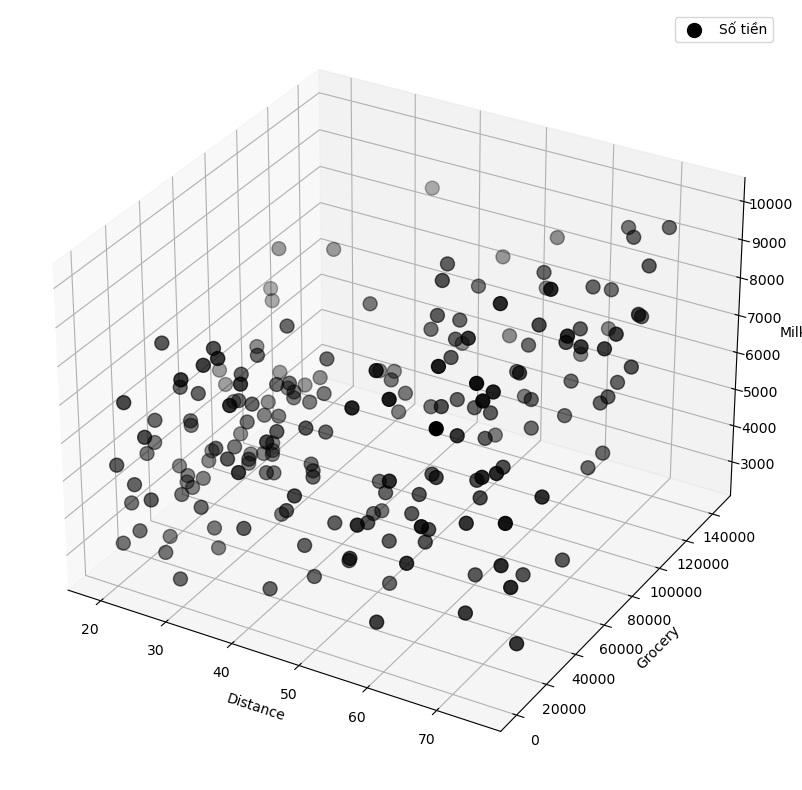

In [18]:
#Trực quan hóa dữ liệu
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

#Mỗi một KH sẽ biểu diễn thành 1 điểm trong không gian 3 chiều:
ax.scatter(data_cluster["Distance"],
           data_cluster["Grocery"], 
           data_cluster["Milk"], 
           c='black', s=100,label='Số tiền')

plt.xlabel("Distance")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

  File "C:\Users\songn\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 230, in _count_physical_cores
    cpu_info = cpu_info.stdout.decode('utf-8').splitlines()


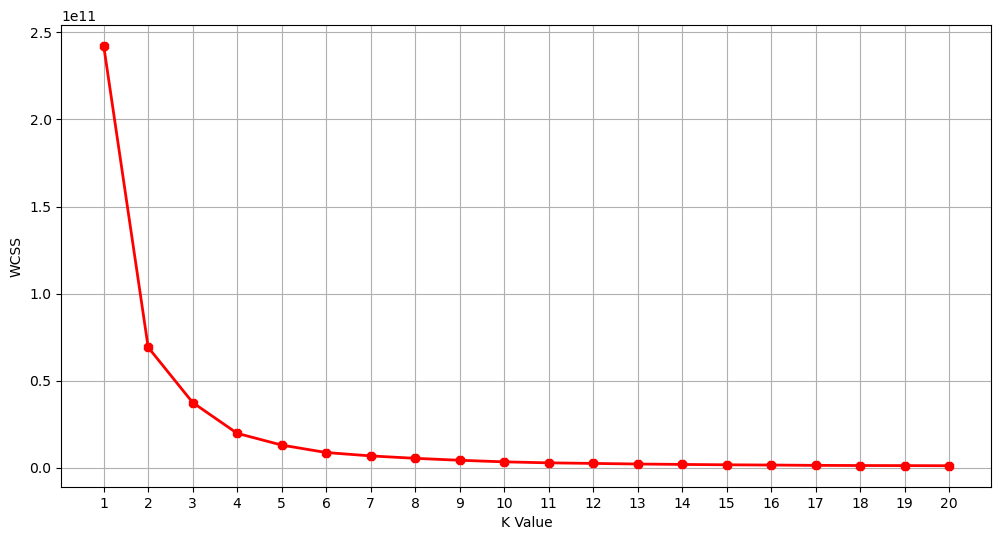

In [19]:
#PHƯƠNG PHÁP KHỬU TAY --> XÁC ĐỊNH SỐ CỤM TỐI ƯU
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 21
for k in range(1,21):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

Từ biểu đồ trên theo PHƯƠNG PHÁP KHUỶU TAY ta thấy số lượng cụm n = 4 tốt nhất

In [20]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 4 cụm, các tham số khác sử dụng mặc định
model_km = KMeans(n_clusters=4)

#Liệt kê các tham số của mô hình
model_km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [21]:
#Thực hiện phân cụm
model_km.fit_predict(X_cluster)

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
data_cluster["Cluster"] = model_km.labels_
data_cluster

,Distance,Grocery,Milk,Cluster
No,,,,
1,60,69900,6325,3
2,30,79000,5200,3
3,52,85500,7825,3
4,57,17100,8375,0
5,55,5500,5450,0
...,...,...,...,...
196,22,96600,7900,3
197,39,83700,7675,3
198,25,34000,4000,2


2    69
0    59
3    52
1    20
Name: Cluster, dtype: int64


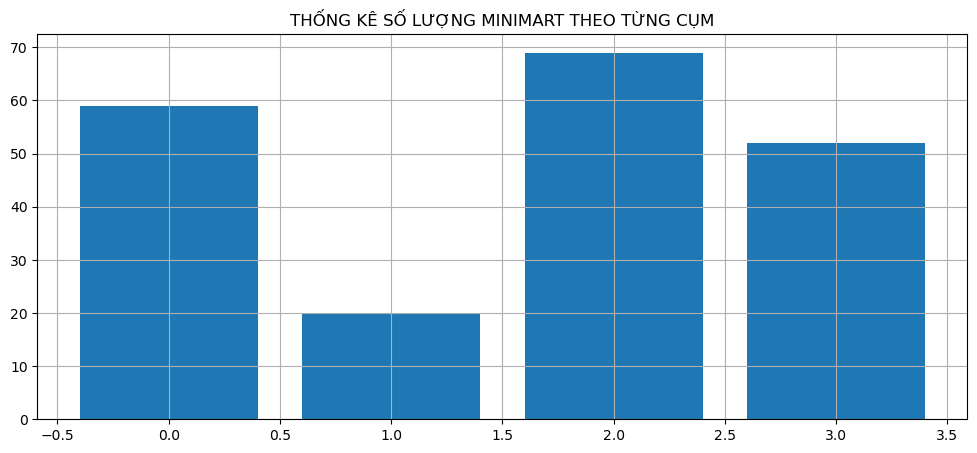

In [22]:
#Thống kê số lượng khách hàng theo mỗi cụm:
sum_cluster = data_cluster.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(12,5))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.title('THỐNG KÊ SỐ LƯỢNG MINIMART THEO TỪNG CỤM')
plt.grid()
plt.show()

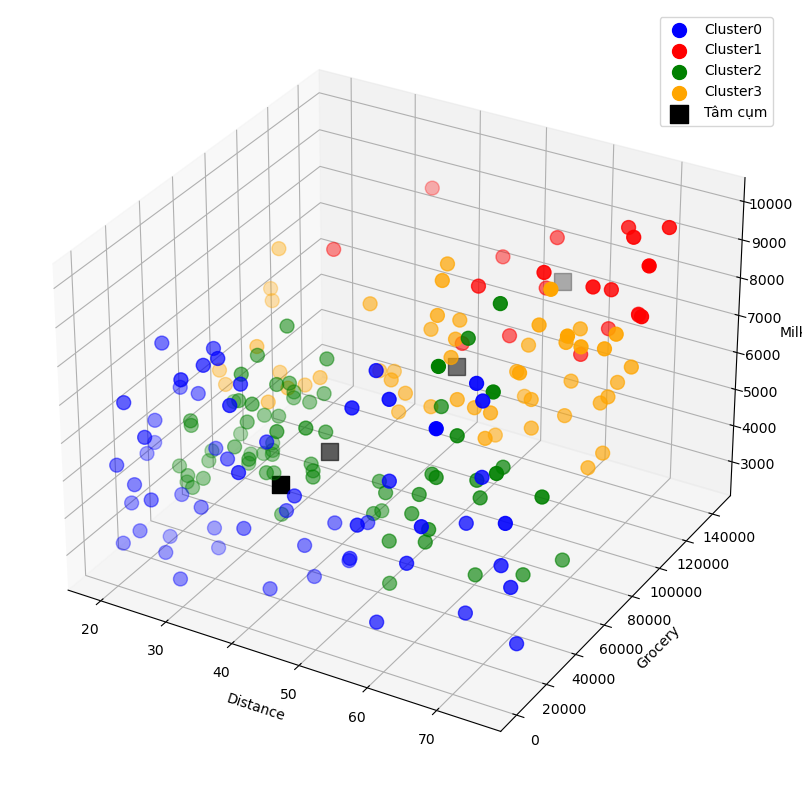

In [23]:
#Trực quan hóa phân cụm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

#Trực quan hóa cụm 0:
ax.scatter(data_cluster["Distance"][data_cluster.Cluster == 0],
           data_cluster["Grocery"][data_cluster.Cluster == 0], 
           data_cluster["Milk"][data_cluster.Cluster == 0], 
           c='blue', s=100,label='Cluster0')

#Trực quan hóa cụm 1:
ax.scatter(data_cluster["Distance"][data_cluster.Cluster == 1], 
           data_cluster["Grocery"][data_cluster.Cluster == 1], 
           data_cluster["Milk"][data_cluster.Cluster == 1], 
           c='red', s=100,label='Cluster1')

#Trực quan hóa cụm 2:
ax.scatter(data_cluster["Distance"][data_cluster.Cluster == 2], 
           data_cluster["Grocery"][data_cluster.Cluster == 2],
           data_cluster["Milk"][data_cluster.Cluster == 2], c='green', s=100,label='Cluster2')

#Trực quan hóa cụm 3:
ax.scatter(data_cluster["Distance"][data_cluster.Cluster == 3],
           data_cluster["Grocery"][data_cluster.Cluster == 3],
           data_cluster["Milk"][data_cluster.Cluster == 3], 
           c='orange', s=100,label='Cluster3')


#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           model_km.cluster_centers_[:, 2], 
           color = 'black', label = 'Tâm cụm',s=150,marker='s')


plt.xlabel("Distance")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

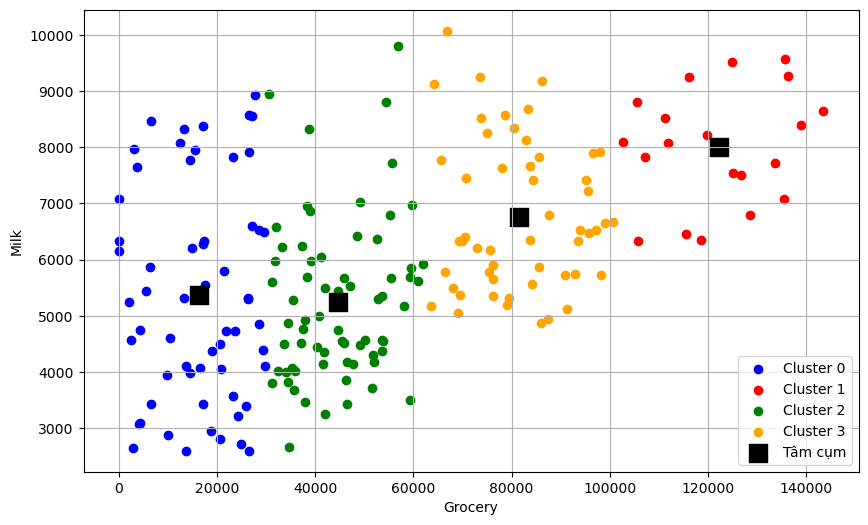

In [43]:
import matplotlib.pyplot as plt

# Chọn hai đặc trưng để hiển thị
feature1 = "Grocery"
feature2 = "Milk"

# Khởi tạo biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ các điểm dữ liệu từ các cụm khác nhau
for cluster_label, color in zip(range(5), ['blue', 'red', 'green', 'orange']):
    cluster_data = data_cluster[data_cluster['Cluster'] == cluster_label]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], c=color, label=f'Cluster {cluster_label}')

# Vẽ tâm của các cụm
plt.scatter(model_km.cluster_centers_[:, data_cluster.columns.get_loc(feature1)], 
            model_km.cluster_centers_[:, data_cluster.columns.get_loc(feature2)], 
            color='black', marker='s', s=150, label='Tâm cụm')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.grid(True)
plt.show()


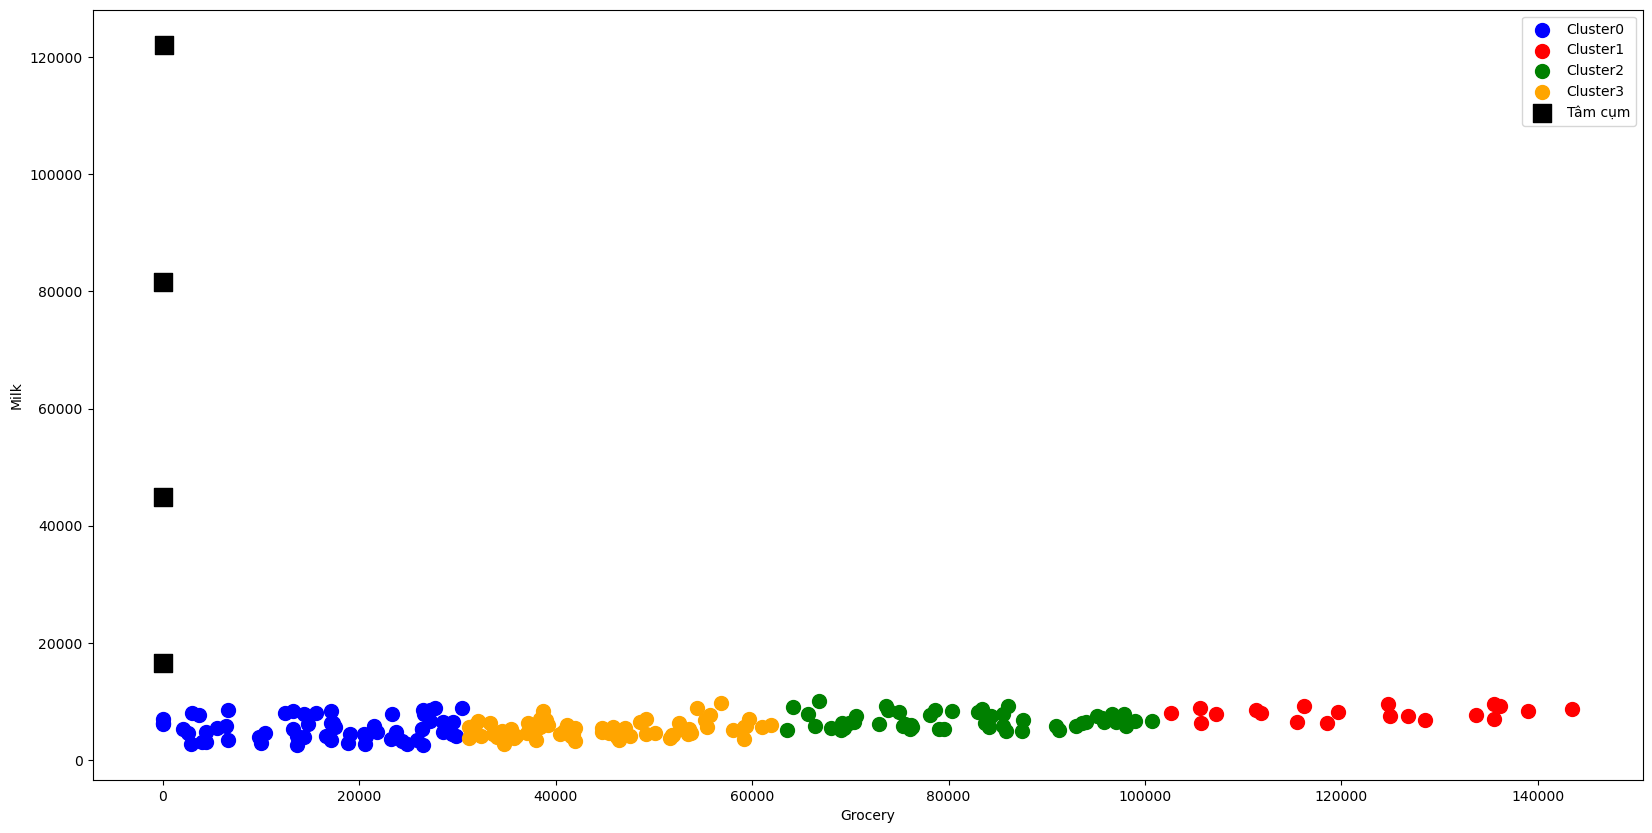

In [92]:
#Trực quan hóa phân cụm

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

#Trực quan hóa cụm 0:
ax.scatter(data_cluster["Grocery"][data_cluster.Cluster == 0], 
           data_cluster["Milk"][data_cluster.Cluster == 0], 
           c='blue', s=100,label='Cluster0')

#Trực quan hóa cụm 1:
ax.scatter(data_cluster["Grocery"][data_cluster.Cluster == 1], 
           data_cluster["Milk"][data_cluster.Cluster == 1], 
           c='red', s=100,label='Cluster1')

#Trực quan hóa cụm 2:
ax.scatter(data_cluster["Grocery"][data_cluster.Cluster == 2],
           data_cluster["Milk"][data_cluster.Cluster == 2], c='green', s=100,label='Cluster2')

#Trực quan hóa cụm 3:
ax.scatter(data_cluster["Grocery"][data_cluster.Cluster == 3],
           data_cluster["Milk"][data_cluster.Cluster == 3], 
           c='orange', s=100,label='Cluster3')


#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           color = 'black', label = 'Tâm cụm',s=150,marker='s')


plt.xlabel("Grocery")
plt.ylabel("Milk")

plt.legend()
plt.show()

In [28]:
#Vị trí tâm của các cụm
np.round(model_km.cluster_centers_,1)

array([[4.12000e+01, 1.62458e+04, 5.36310e+03],
       [5.93000e+01, 1.22140e+05, 8.00000e+03],
       [4.19000e+01, 4.46406e+04, 5.25580e+03],
       [5.24000e+01, 8.15885e+04, 6.76540e+03]])

In [29]:
#Tổng bình phương khoảng cách từ các mẫu tới trung tâm cụm gần nhất.
model_km.inertia_

19665092404.200554

In [30]:
#Danh sách Minimart cụm 0:
cluster_0 = data_cluster[data_cluster.Cluster== 0]
print('Số Minimart thuộc cụm 0:', cluster_0.shape[0])
cluster_0

Số Minimart thuộc cụm 0: 59


,Distance,Grocery,Milk,Cluster
No,,,,
4,57,17100,8375,0
5,55,5500,5450,0
6,68,27200,8550,0
7,41,20500,4500,0
9,33,13200,8325,0
14,46,29800,4100,0
18,20,9800,3950,0
21,49,25900,3400,0
22,22,0,7075,0


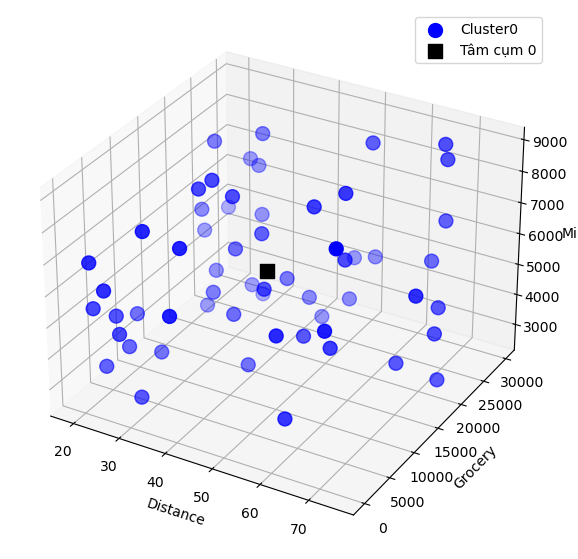

In [31]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 0:
ax.scatter(cluster_0['Distance'], 
           cluster_0["Grocery"], 
           cluster_0["Milk"], 
           c='blue', s=100,label='Cluster0')

#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[0, 0], 
           model_km.cluster_centers_[0, 1],
           model_km.cluster_centers_[0, 2], 
           color = 'black', label = 'Tâm cụm 0',s=100,marker='s')

plt.xlabel("Distance")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

In [32]:
#Đặc trưng thống kê của khách hàng cụm 0
cluster_0[['Distance','Grocery','Milk']].describe()

,Distance,Grocery,Milk
count,59.000000,59.000000,59.000000
mean,41.220339,16245.762712,5363.135593
std,17.737616,9232.538449,1904.245234
min,19.000000,0.000000,2600.000000
25%,25.000000,8200.000000,3962.500000
50%,37.000000,17100.000000,5250.000000
75%,56.000000,24600.000000,6562.500000
max,75.000000,29800.000000,8925.000000


*Đặc trưng thống kê của danh sách minimart cụm 0 là:*
- Có tổng số 60 minimart ở cụm 0
- Khoảng cách trung bình từ minimart tới nhà phân phối là 41.55, Nhỏ nhất là 19, và lớn nhất là 75
- Số tiền mà minimart mua tạp hóa trong năm 2019 trung bình là 16483, nhỏ nhất là 0 và lớn nhất là 30500
- Số tiền mà các minimart mua sữa từ nhà phân phối trung bình là 5422, nhỏ nhất là 26000, và lớn nhất là 8950

In [33]:
# Minimart cụm 1:
#Danh sách Minimart cụm 1:
cluster_1=data_cluster[data_cluster.Cluster== 1]
print('Số Minimart thuộc cụm 1:', cluster_1.shape[0])
cluster_1

Số Minimart thuộc cụm 1: 20


,Distance,Grocery,Milk,Cluster
No,,,,
16,35,143500,8650,1
25,56,126800,7500,1
40,66,111300,8525,1
41,51,102700,8100,1
50,63,118500,6350,1
53,60,105600,8800,1
54,55,139000,8400,1
61,70,125000,7550,1
77,28,107200,7825,1


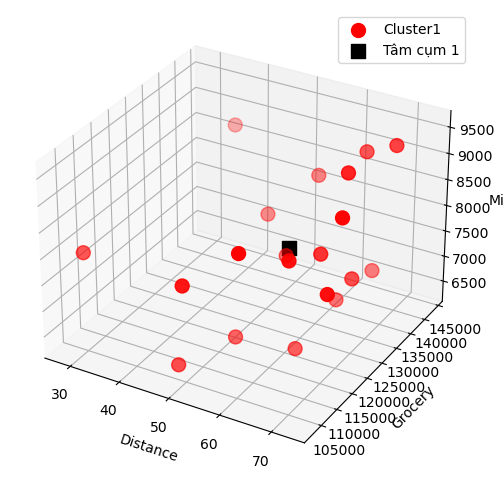

In [34]:
#Trực quan hóa dữ liệu
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 1:
ax.scatter(cluster_1['Distance'], 
           cluster_1["Grocery"], 
           cluster_1["Milk"],
           c='red', s=100,label='Cluster1')

#Hiển thị tâm cụm 1:
ax.scatter(model_km.cluster_centers_[1, 0], 
           model_km.cluster_centers_[1, 1],
           model_km.cluster_centers_[1, 2], 
           color = 'black', label = 'Tâm cụm 1',s=100, marker='s')

plt.xlabel("Distance")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

In [35]:
#Đặc trưng thống kê của minimart Cụm 1
cluster_1[['Distance','Grocery','Milk']].describe()

,Distance,Grocery,Milk
count,20.000000,20.000000,20.00000
mean,59.300000,122140.000000,8000.00000
std,12.524082,12517.078859,1034.75779
min,28.000000,102700.000000,6325.00000
25%,52.500000,111675.000000,7393.75000
50%,64.000000,122250.000000,8087.50000
75%,68.250000,134150.000000,8687.50000
max,73.000000,143500.000000,9575.00000


*Đặc trưng thống kê của các minimart tại tâm cụm 1 là:*
- Có tổng số 20 minimart ở cụm 1
- Khoảng cách trung bình từ minimart tới nhà phân phối là 59.3, Nhỏ nhất là 28, và lớn nhất là 73
- Số tiền mà minimart mua tạp hóa trong năm 2019 trung bình là 122140, nhỏ nhất là 102700 và lớn nhất là 143500
- Số tiền mà các minimart mua sữa từ nhà phân phối trung bình là 8000, nhỏ nhất là 6325, và lớn nhất là 9575

In [36]:
#Danh sách minimart cụm 2:
cluster_2 = data_cluster[data_cluster.Cluster== 2]
print('Số minimart thuộc cụm 2:', cluster_2.shape[0])
cluster_2

Số minimart thuộc cụm 2: 69


,Distance,Grocery,Milk,Cluster
No,,,,
10,37,31800,5975,2
11,33,59200,5700,2
13,48,46200,3850,2
24,30,51800,4300,2
26,56,40800,5000,2
...,...,...,...,...
191,57,44700,5450,2
193,74,39200,5975,2
198,25,34000,4000,2


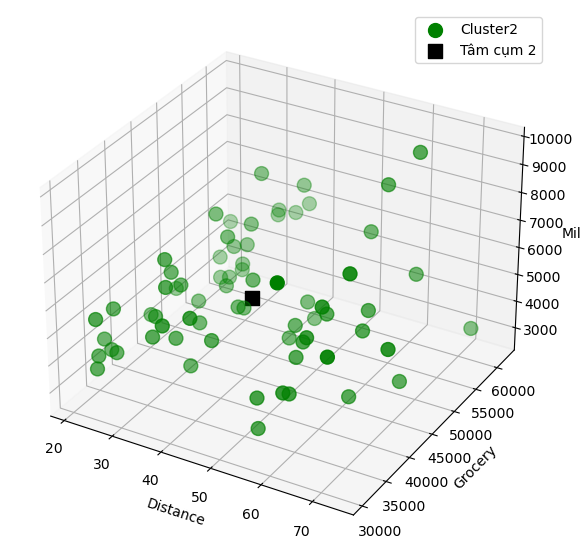

In [37]:
#Trực quan hóa dữ liệu:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 2:
ax.scatter(cluster_2['Distance'], 
           cluster_2["Grocery"], 
           cluster_2["Milk"],
           c='green', s=100,label='Cluster2')

#Hiển thị tâm cụm 2:
ax.scatter(model_km.cluster_centers_[2, 0], 
           model_km.cluster_centers_[2, 1],
           model_km.cluster_centers_[2, 2], 
           color = 'black', label = 'Tâm cụm 2',s=100,marker='s')

plt.xlabel("Distance")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

In [38]:
#Đặc trưng thống kê của minimart cụm 2:
cluster_2[['Distance','Grocery','Milk']].describe()

,Distance,Grocery,Milk
count,69.000000,69.000000,69.000000
mean,41.855072,44640.579710,5255.797101
std,15.425605,8959.587682,1416.701488
min,21.000000,30500.000000,2675.000000
25%,30.000000,37200.000000,4175.000000
50%,36.000000,44700.000000,5000.000000
75%,56.000000,52500.000000,5975.000000
max,74.000000,61900.000000,9800.000000


*Đặc trưng thống kê của các minimart tại tâm cụm 2 là:*
- Có tổng số 52 minimart ở cụm 2
- Khoảng cách trung bình từ minimart tới nhà phân phối là 52, Nhỏ nhất là 19, và lớn nhất là 75.
- Số tiền mà minimart mua tạp hóa trong năm 2019 trung bình là 81588, nhỏ nhất là 63500 và lớn nhất là 100700
- Số tiền mà các minimart mua sữa từ nhà phân phối trung bình là 6765, nhỏ nhất là 4875, và lớn nhất là 10075

In [39]:
#Danh sách minimart Cụm 3:
cluster_3 = data_cluster[data_cluster.Cluster== 3]
print('Số KH thuộc cụm 3:', cluster_3.shape[0])
cluster_3

Số KH thuộc cụm 3: 52


,Distance,Grocery,Milk,Cluster
No,,,,
1,60,69900,6325,3
2,30,79000,5200,3
3,52,85500,7825,3
8,20,69000,5050,3
12,21,95800,6475,3
15,68,83000,8125,3
17,72,91300,5125,3
19,26,79500,5325,3
20,60,66400,5775,3


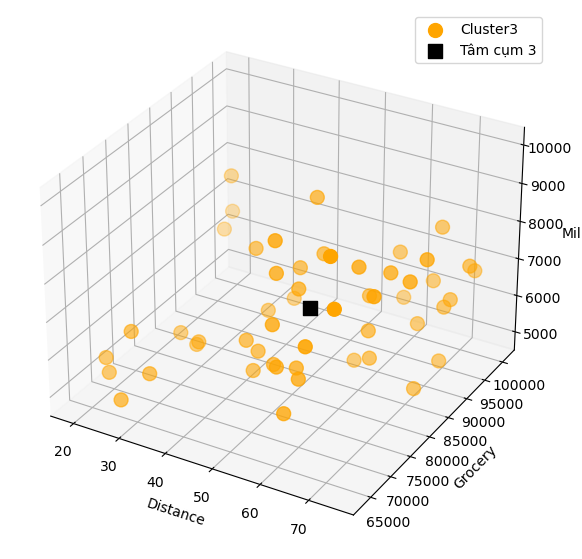

In [40]:
#Trực quan hóa dữ liệu:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 3:
ax.scatter(cluster_3['Distance'], 
           cluster_3["Grocery"], 
           cluster_3["Milk"], 
           c='orange', s=100,label='Cluster3')

#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[3, 0], 
           model_km.cluster_centers_[3, 1],
           model_km.cluster_centers_[3, 2], 
           color = 'black', label = 'Tâm cụm 3',s=100,marker='s')

plt.xlabel("Distance")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

In [41]:
cluster_3[['Distance','Grocery','Milk']].describe()

,Distance,Grocery,Milk
count,52.000000,52.000000,52.000000
mean,52.403846,81588.461538,6765.384615
std,17.310611,10691.093120,1322.552807
min,19.000000,63500.000000,4875.000000
25%,40.750000,73425.000000,5725.000000
50%,56.000000,81700.000000,6437.500000
75%,66.250000,91000.000000,7787.500000
max,75.000000,100700.000000,10075.000000


*Đặc trưng thống kê của các minimart tại tâm cụm 3 là:*
- Có tổng số 68 minimart ở cụm 3
- Khoảng cách trung bình từ minimart tới nhà phân phối là 41, Nhỏ nhất là 21, và lớn nhất là 74, 
- Số tiền mà minimart mua tạp hóa trong năm 2019 trung bình là 44848, nhỏ nhất là 31200 và lớn nhất là 61900
- Số tiền mà các minimart mua sữa từ nhà phân phối trung bình là 5201, nhỏ nhất là 2675, và lớn nhất là 9800